<a href="https://colab.research.google.com/github/principioincertidumbre/ComputerVision/blob/main/IntroCV_Tarea_1_Sof%C3%ADa_Vits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <h1>Introducción a la Visión Computacional</h1>
    <h1>Tarea 1</h1>
</center>

### Magíster en Data Science
### Universidad del Desarrollo

-----------------------

<div align="right">

Estudiante: Sofía Vits

Profesor: Takeshi Asahi

Fecha de Entrega: Martes 22, Abril 2025
</div>

# 1.- Introducción

La papas es un tubérculo que fue domesticado en la región andina de Sudamérica. Es uno de los cultivos más importantes para la alimentación humana, junto con el arroz y el trigo. Sin embargo, existen enfermedades de las papas que generan pérdidas económicas y afectan la calidad del producto final. Por lo tanto, es importante detectar estas enfermedades a tiempo.

El dataset "Potato Diseases Datasets" fue compilado a partir de diversas páginas web, siendo validado por el Instituto de Investigación Agrícola de Bangladesh (BARI). Considerando la forma en que se obtuvieron las imágenes, no se puede determinar el tipo de sensor exacto utilizado para fotografiar las papas, sólo pudiendo deducir que se trataría de diversos tipos de cámaras fotográficas. Además, la resolución de las imágenes no es homogénea, existiendo imágenes cuadradas y rectangulares de diferentes resoluciones.

Las condiciones ambientales en las cuales las fotos fueron capturadas son variadas, siendo tomadas algunas de día en un campo, mientras que otras fueron tomadas en lugares cerrados con la iluminación adecuada para poder distinguir las características de las papas sanas y enfermas.

En algunas imágenes aparecen otros objetos como manos, pala, partes de muebles, hojas, madera, canastos, tierra, saco de papas.

El dataset completo contiene 451 imágenes, siendo clasificadas como common scab (papas infectadas por bacteria *Streptomyces scabies*, contiene 62 imágenes), blackleg (papas infectadas por bacteria *Pectobacterium atrosepticum*, contiene 60 imágenes), dry rot (infección causada por hongos del género *Fusarium*, contiene 60 imágenes), pink rot (infección fúngica causada por *Phytophthora erythroseptica*, contiene 57 imágenes), black scurf (infección fúngica, contiene 58 imágenes), papas sanas (80 imágenes) y papas afectadas por otros tipos de infecciones (74 imágenes).

La aplicación de este dataset es realizar una clasificación multiclase, considerando una clase de papas sanas y seis clases de papas que han sido infectadas por bacterias y hongos.


**Dataset utilizado:**

https://www.kaggle.com/datasets/mukaffimoin/potato-diseases-datasets/

**Fuente del dataset:**

F. T. J. Faria, M. Bin Moin, A. Al Wase, M. R. Sani, K. M. Hasib and M. S. Alam, "Classification of Potato Disease with Digital Image Processing Technique: A Hybrid Deep Learning Framework," 2023 IEEE 13th Annual Computing and Communication Workshop and Conference (CCWC), Las Vegas, NV, USA, 2023, pp. 0820-0826, doi: 10.1109/CCWC57344.2023.10099162.

**Otras fuentes:**

Centro Internacional de la Papa. "Datos y cifras de la papa". Recuperado de: https://cipotato.org/es/potato/potato-facts-and-figures/

Méndez, P., Gaete, N. "Principales enfermedades que afectan al cultivo de la papa", INIA Carillanca. Recuperado de: https://tizon.inia.cl/assets/boletines/inia%20carillanca%20-%20principales%20enfermedades%20que%20afectan%20el%20cultivo%20de%20la%20papa.pdf

North Dakota State University. "Common scab". Recuperado de: https://www.ag.ndsu.edu/potatoextension/common-scab

The Royal Horticultural Society. "Potato blackleg". Recuperado de: https://www.rhs.org.uk/disease/potato-blackleg

Cornell University. "Fusarium Dry Rot of Potato". Recuperado de: https://www.vegetables.cornell.edu/pest-management/disease-factsheets/fusarium-dry-rot-of-potato/

University of California. "Pink Rot". Recuperado de: https://ipm.ucanr.edu/agriculture/potato/pink-rot/#gsc.tab=0



# 2.- Metodología

1.- Cargar las imágenes del dataset "Potato Diseases Datasets", verificando que se puede acceder correctamente a cada carpeta mostrando la primera imagen de cada una de ellas.

2.- Obtener la lista de imágenes en formato png para convertirlas a formato jpg.

3.- Cambiar la resolución de las imágenes del dataset a una resolución igual a 200x200.

4.- Filtrar las imágenes del dataset con filtros Gaussiano, Sobel, Máximo, y Mínimo, comparando una muestra de las imágenes obtenidas con las imágenes originales.

# 3.- Desarrollo

### 3.1.- Carga de las imágenes del dataset

In [75]:
#Importando librerías
from PIL import Image
from os.path import exists
import os
import numpy as np
from numpy import zeros, sqrt, array
from scipy.ndimage import sobel
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import glob
from glob import glob
from scipy.ndimage import maximum_filter
from scipy.ndimage import minimum_filter

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


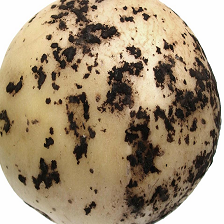

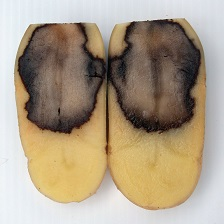

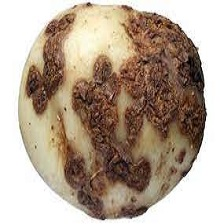

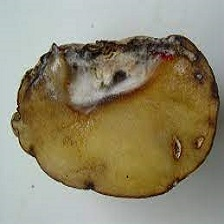

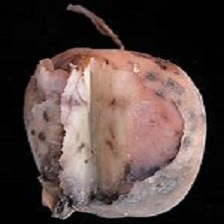

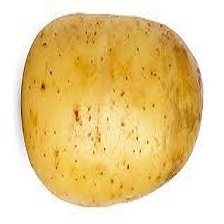

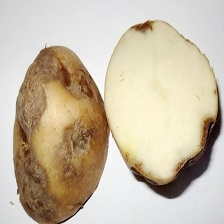

In [77]:
#Abrir una imagen de cada carpeta que contiene imágenes de papas enfermas o sanas

inPath1  = '/content/drive/MyDrive/potato/Black Scurf'
inPath2  = '/content/drive/MyDrive/potato/Blackleg'
inPath3  = '/content/drive/MyDrive/potato/Common Scab'
inPath4 = '/content/drive/MyDrive/potato/Dry Rot'
inPath5 = '/content/drive/MyDrive/potato/Pink Rot'
inPath6 = '/content/drive/MyDrive/potato/Healthy Potatoes'
inPath7 = '/content/drive/MyDrive/potato/Miscellaneous'

# Define carpetas de salida, las cuales serán creadas posteriormente en este trabajo

outPath1  = '/content/drive/MyDrive/potato/Black Scurf proc'
outPath2  = '/content/drive/MyDrive/potato/Blackleg proc'
outPath3  = '/content/drive/MyDrive/potato/Common Scab proc'
outPath4 = '/content/drive/MyDrive/potato/Dry Rot proc'
outPath5 = '/content/drive/MyDrive/potato/Pink Rot proc'
outPath6 = '/content/drive/MyDrive/potato/Healthy Potatoes proc'
outPath7 = '/content/drive/MyDrive/potato/Miscellaneous proc'


#Black Scurf
pil_im1  = Image.open(f'{inPath1}/1.jpg')

# Blackleg
pil_im2  = Image.open(f'{inPath2}/1.jpg')

# Common Scab
pil_im3  = Image.open(f'{inPath3}/1.jpg')

# Dry Rot
pil_im4  = Image.open(f'{inPath4}/1.jpg')

# Pink Rot
pil_im5 = Image.open(f'{inPath5}/1.jpg')

# Healthy Potato
pil_im6  = Image.open(f'{inPath6}/1.jpg')

# Miscellaneous
pil_im7  = Image.open(f'{inPath7}/1.jpg')

display(pil_im1,pil_im2,pil_im3,pil_im4,pil_im5,pil_im6,pil_im7)

En este punto se verifica que fue posible acceder a las carpetas del dataset, mostrando la primera imagen de cada carpeta.

In [78]:
# Verifica dimensiones y canales de las imágenes anteriormente mostradas

print(np.array(pil_im1).shape)
print(pil_im1.size)

print(np.array(pil_im2).shape)
print(pil_im2.size)

print(np.array(pil_im3).shape)
print(pil_im3.size)

print(np.array(pil_im4).shape)
print(pil_im4.size)

print(np.array(pil_im5).shape)
print(pil_im5.size)

print(np.array(pil_im6).shape)
print(pil_im6.size)

print(np.array(pil_im7).shape)
print(pil_im7.size)

(224, 224, 4)
(224, 224)
(224, 224, 3)
(224, 224)
(224, 224, 3)
(224, 224)
(224, 224, 3)
(224, 224)
(224, 224, 3)
(224, 224)
(224, 224, 3)
(224, 224)
(224, 224, 3)
(224, 224)


Se observa que las primeras imágenes de cada carpeta tienen una resolución igual a 224x224, y salvo el caso de la imagen de la carpeta Black Scurf, poseen 3 canales. Se separarán los canales de una imagen de la carpeta Black Scurf para verificar si efectivamente posee 4 canales (RGBA).

Image size: 224 x 224


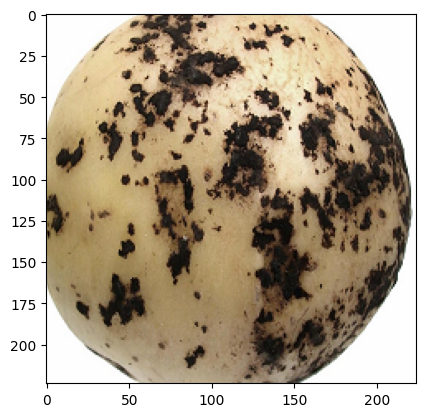

In [79]:
#Abriendo y desplegando imagen con cuatro canales
image = Image.open('{}/1.jpg'.format(inPath1))
xsize, ysize = image.size
print("Image size: {} x {}".format(xsize, ysize))
plt.imshow(image)

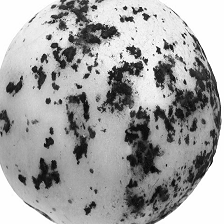

In [80]:
# Separando en los canales r, g, b y a
r, g, b, a = image.split()
# Desplegando el canal rojo
r

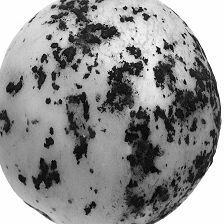

In [81]:
#Desplegando el canal verde
g

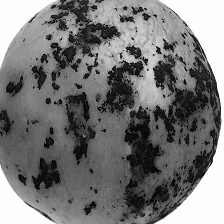

In [82]:
#Desplegando el color azul
b

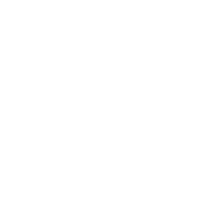

In [83]:
#Desplegando el canal alfa (define opacidad de cada pixel)
a

In [84]:
# Obteniendo los valores de cada pixel
r_data = np.array(r.getdata()) # Los datos están ahora en un arreglo de largo ysize*xsize
g_data = np.array(g.getdata())
b_data = np.array(b.getdata())
a_data = np.array(a.getdata())

In [85]:
# Redimensionando el arreglo (2 dimensiones)
r_data = r_data.reshape(ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)
r_data.shape

(224, 224)

In [86]:
g_data.shape

(224, 224)

In [87]:
b_data.shape

(224, 224)

In [88]:
a_data.shape

(50176,)

Se comprueba que efectivamente existe un canal alfa en la imagen analizada, el cual no debiera estar presente en las imágenes que poseen 3 canales.

### 3.2.- Verificar si existen imágenes en formato png en las carpetas de origen del dataset

In [89]:
from glob import glob

#Obtener una lista de las imagenes .png dentro de un directorio
def get_imlist(path, ext):
    """ Retorna la lista de todos los archivos.png en un directorio. """
    #[os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]
    return glob(f"{path}/*.{ext}")



filelist1 = get_imlist(inPath1, "png")
print(filelist1)
filelist2 = get_imlist(inPath2, "png")
print(filelist2)
filelist3 = get_imlist(inPath3, "png")
print(filelist3)
filelist4 = get_imlist(inPath4, "png")
print(filelist4)
filelist5 = get_imlist(inPath5, "png")
print(filelist5)
filelist6 = get_imlist(inPath6, "png")
print(filelist6)
filelist7 = get_imlist(inPath7, "png")
print(filelist7)

[]
[]
[]
['/content/drive/MyDrive/potato/Dry Rot/46.png']
[]
[]
[]


Sólo se detectó una imagen en formato png en la carpeta Dry Rot.

In [90]:
filelist4.sort()
for file in filelist4:
    print(file)

/content/drive/MyDrive/potato/Dry Rot/46.png


In [91]:
fileNames = [os.path.split(fileName)[1]  for fileName in filelist4]
fileNames

['46.png']

In [92]:
#Convertir la lista de imagenes .png a .jpg

path4 = inPath4

for fileName in fileNames:
    infile = f"{inPath4}/{fileName}"
    outfile = "{}/{}.jpg".format(inPath4, os.path.splitext(fileName)[0])
    if infile != outfile:
        try:
            print('Processing' , infile)
            Image.open(infile).convert('RGB').save(outfile)

        except Exception as e:
            print ('Cannot convert', infile)
            print(e)

Processing /content/drive/MyDrive/potato/Dry Rot/46.png


En este caso se guardó la imagen en formato .jpg en el mismo directorio que la imagen original en formato .png para facilitar el preprocesamiento masivo y aplicación de filtros Gaussiano, Sobel, Máximo y Mínimo. Esta conversión de formato png a jpg es realizada porque jpg es un formato optimizado para representar imágenes de cámaras fotográficas, el cual es el caso de las fotos del dataset de papas.

### 3.3.- Procedimiento para cambiar la resolución de las imágenes del dataset a resolución 200x200

Las imágenes del dataset presentan diferentes resoluciones, por lo cual se cambiará a 200x200 para que todas tengan la misma resolución. Debido a que existen imágenes rectangulares es esperable que no se conserve su relación dimensional al realizar este ajuste. Las imágenes serán utilizadas para clasificación multiclase, por lo tanto, es importante que el ancho y alto de ellas sean iguales, especialmente si estas fotografías son transformadas en tensores. Además, esta resolución es adecuada para el procesamiento que será aplicado posteriormente.

El dataset será procesado carpeta por carpeta, creando un bucle para cada una de las carpetas del dataset para cambiar la resolución de las imágenes a 200x200

In [93]:
import glob

#Cambia resolución de imágenes ubicadas en un directorio específico

# Carpeta Black Scurf
path = outPath1 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path):
    os.makedirs(path)

# bucle para cambiar la resolución de las imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Black Scurf/*.jpg'): # carpeta de origen
    img = Image.open(filename).resize((200,200))
    img = img.convert('RGB')
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path2 = outPath2

if not os.path.exists(path2):
    os.makedirs(path2)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg/*.jpg'):
    img = Image.open(filename).resize((200,200))
    img = img.convert('RGB')
    img.save('{}{}{}'.format(path2,'/',os.path.split(filename)[1]))

# Carpeta Common Scab

path3 = outPath3

if not os.path.exists(path3):
    os.makedirs(path3)


for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab/*.jpg'):
    img = Image.open(filename).resize((200,200))
    img = img.convert('RGB')
    img.save('{}{}{}'.format(path3,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path4 = outPath4

if not os.path.exists(path4):
    os.makedirs(path4)

for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot/*.jpg'): #evita que la imagen png sea agregada a la carpeta de imágenes preprocesadas
    img = Image.open(filename).resize((200,200))
    img = img.convert('RGB')
    img.save('{}{}{}'.format(path4,'/',os.path.split(filename)[1]))


# Carpeta Pink Rot

path5 = outPath5

if not os.path.exists(path5):
    os.makedirs(path5)


for filename in glob.glob('/content/drive/MyDrive/potato/Pink Rot/*.jpg'):
    img = Image.open(filename).resize((200,200))
    img = img.convert('RGB')
    img.save('{}{}{}'.format(path5,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path6 = outPath6

if not os.path.exists(path6):
    os.makedirs(path6)


for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes/*.jpg'):
    img = Image.open(filename).resize((200,200))
    img = img.convert('RGB')
    img.save('{}{}{}'.format(path6,'/',os.path.split(filename)[1]))

# Carpeta Miscellaneous

path7 = outPath7

if not os.path.exists(path7):
    os.makedirs(path7)


for filename in glob.glob('/content/drive/MyDrive/potato/Miscellaneous/*.jpg'):
    img = Image.open(filename).resize((200,200))
    img = img.convert('RGB')
    img.save('{}{}{}'.format(path7,'/',os.path.split(filename)[1]))

### 3.4.- Aplicación de filtros al dataset

El filtrado de imágenes es un proceso realizado para modificar o mejorar una imagen aplicando un algoritmo o un conjunto de operaciones matemáticas a sus pixeles.  El propósito es resaltar ciertas características de una imagen para facilitar la extracción de información o mejorar su calidad en general.

Primero se probaron diferentes filtros (desenfoque Gaussiano, Sobel, Máximo) con una imagen de muestra antes de aplicar estos filtros al dataset completo, para ajustar sus parámetros en los casos que sea necesario.

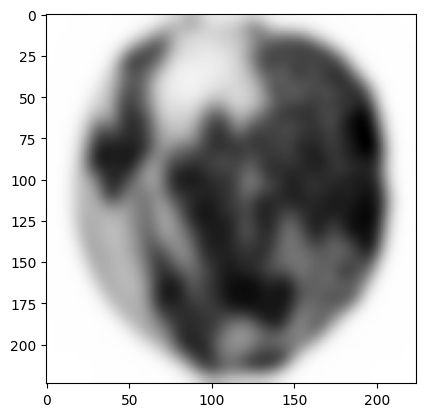

In [94]:
# Common Scan filtro Gaussiano

pil_im3_gr = pil_im3.convert('L')
papa_gauss = gaussian_filter(pil_im3_gr, sigma = 5)
plt.gray()
plt.imshow(papa_gauss)

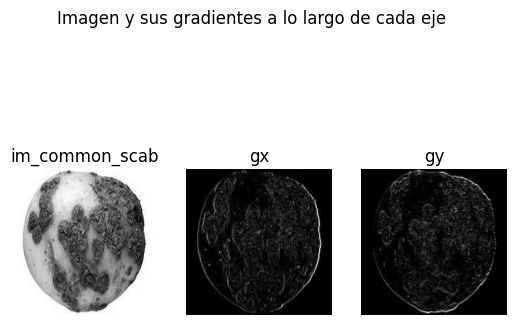

<Figure size 640x480 with 0 Axes>

In [95]:
# Common Scab filtro Sobel

im = (pil_im3).convert('L')
im = array(im)
#Sobel
imx = zeros(im.shape)

sobel(im,1,imx) #Filas (X)

imy = zeros(im.shape)

sobel(im,0,imy) #Columnas (Y)

magnitude = sqrt(imx**2+imy**2)

# Dibujando
plt.close("all")
plt.figure()
plt.suptitle("Imagen y sus gradientes a lo largo de cada eje")
ax = plt.subplot(1,3,1)
ax.axis("off")
ax.imshow(im, cmap = plt.get_cmap('gray'))
ax.set_title("im_common_scab")

ax = plt.subplot(1,3,2)
ax.axis("off")
ax.imshow(np.abs(imx), cmap = plt.get_cmap('gray'))
ax.set_title("gx")

ax = plt.subplot(1,3,3)
ax.axis("off")
ax.imshow(np.abs(imy), cmap = plt.get_cmap('gray'))
ax.set_title("gy")
plt.show()
plt.clf()

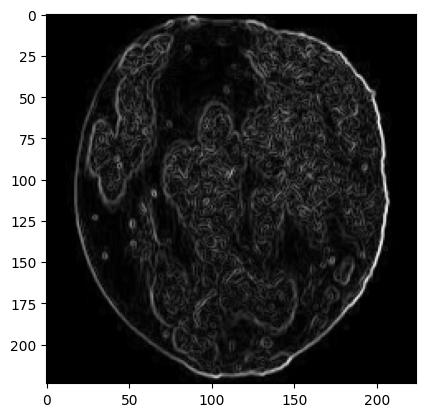

In [96]:
# Observar la magnitud del gradiente
plt.imshow(magnitude, cmap=plt.get_cmap('gray'))
plt.show()

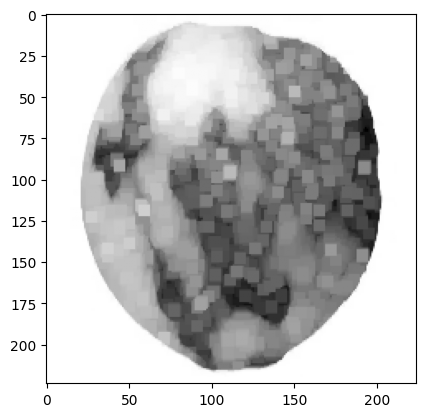

In [97]:
# Common Scab filtro Máximo
pil_im3_gr = pil_im3.convert('L')
papa_m = maximum_filter(pil_im3_gr, size = 7)
plt.gray()
plt.imshow(papa_m)

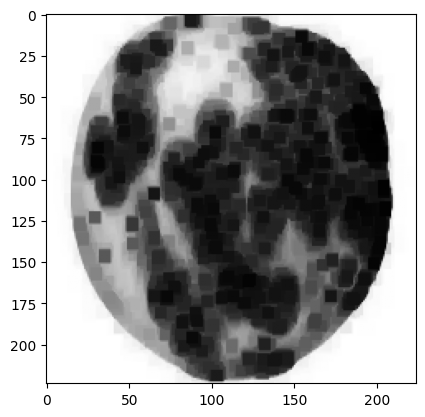

In [98]:
# Common Scab filtro Mínimo
pil_im3_gr = pil_im3.convert('L')
papa_mi = minimum_filter(pil_im3_gr, size = 7)
plt.gray()
plt.imshow(papa_mi)

 En esta sección se aplicará el filtro desenfoque Gaussiano a las imágenes del dataset para crear imágenes borrosas en escala de grises de las papas enfermas y sanas. El parámetro sigma corresponde a la desviación estándar.

In [99]:
import glob

# Carpeta Black Scurf Gaussiana
path_g1 = '/content/drive/MyDrive/potato/Black Scurf Gauss' # carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path_g1):
    os.makedirs(path_g1)

# Bucle para filtrar las imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Black Scurf proc/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    im = img.convert('L')
    arr = gaussian_filter(im, sigma = 5)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_g1,'/',os.path.split(filename)[1]))

# Carpeta Blackleg Gaussiana
path_g2 = '/content/drive/MyDrive/potato/Blackleg Gauss'

if not os.path.exists(path_g2):
    os.makedirs(path_g2)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg proc/*.jpg'):
    img = Image.open(filename)
    arr = gaussian_filter(img, sigma = 5)
    im = Image.fromarray(arr)
    im.save('{}{}{}'.format(path_g2,'/',os.path.split(filename)[1]))

# Carpeta Common Scab Gaussiana
path_g3 = '/content/drive/MyDrive/potato/Common Scab Gauss'

if not os.path.exists(path):
    os.makedirs(path)


for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = gaussian_filter(img, sigma = 5)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_g3,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot Gaussiana
path_g4 = '/content/drive/MyDrive/potato/Dry Rot Gauss'

if not os.path.exists(path_g4):
    os.makedirs(path_g4)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = gaussian_filter(img, sigma = 5)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_g4,'/',os.path.split(filename)[1]))

# Carpeta Pink Rot Gaussiana
path_g5 = '/content/drive/MyDrive/potato/Pink Rot Gauss'

if not os.path.exists(path_g5):
    os.makedirs(path_g5)


for filename in glob.glob('/content/drive/MyDrive/potato/Pink Rot proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = gaussian_filter(img, sigma = 5)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_g5,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes Gaussiana
path_g6 = '/content/drive/MyDrive/potato/Healthy Potatoes Gauss'

if not os.path.exists(path_g6):
    os.makedirs(path_g6)


for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = gaussian_filter(img, sigma = 5)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_g6,'/',os.path.split(filename)[1]))

# Carpeta Miscellaneous Gaussiana
path_g7 = '/content/drive/MyDrive/potato/Miscellaneous Gauss'

if not os.path.exists(path_g7):
    os.makedirs(path_g7)



for filename in glob.glob('/content/drive/MyDrive/potato/Miscellaneous proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = gaussian_filter(img, sigma = 5)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_g7,'/',os.path.split(filename)[1]))

En esta parte se aplicará el filtro Sobel al dataset completo. El filtro Sobel detecta los bordes horizontales y verticales separadamente sobre una imagen en escala de grises. El operador Sobel es de tipo diferencial.

In [100]:
import glob

# Carpeta Black Scurf Sobel
path_s1 = '/content/drive/MyDrive/potato/Black Scurf Sobel' #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path_s1):
    os.makedirs(path_s1)

# bucle para filtrar las imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Black Scurf proc/*.jpg'): # carpeta de origen
    im = Image.open(filename)
    im = im.convert('L')
    im = array(im)
    #Sobel
    imx = zeros(im.shape)
    sobel(im,1,imx) #Filas (X)
    imy = zeros(im.shape)
    sobel(im,0,imy) #Columnas (Y)
    magnitude = sqrt(imx**2+imy**2)
    img = Image.fromarray(magnitude)
    img = img.convert('L')
    img.save('{}{}{}'.format(path_s1,'/',os.path.split(filename)[1]))


# Carpeta Blackleg Sobel
path_s2 = '/content/drive/MyDrive/potato/Blackleg Sobel'

if not os.path.exists(path_s2):
    os.makedirs(path_s2)



for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg proc/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = array(im)
    #Sobel
    imx = zeros(im.shape)
    sobel(im,1,imx) #Filas (X)
    imy = zeros(im.shape)
    sobel(im,0,imy) #Columnas (Y)
    magnitude = sqrt(imx**2+imy**2)
    img = Image.fromarray(magnitude)
    img = img.convert('L')
    img.save('{}{}{}'.format(path_s2,'/',os.path.split(filename)[1]))

# Carpeta Common Scab Sobel
path_s3 = '/content/drive/MyDrive/potato/Common Scab Sobel'

if not os.path.exists(path_s3):
    os.makedirs(path_s3)


for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab proc/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = array(im)
    #Sobel
    imx = zeros(im.shape)
    sobel(im,1,imx) #Filas (X)
    imy = zeros(im.shape)
    sobel(im,0,imy) #Columnas (Y)
    magnitude = sqrt(imx**2+imy**2)
    img = Image.fromarray(magnitude)
    img = img.convert('L')
    img.save('{}{}{}'.format(path_s3,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot Sobel
path_s4 = '/content/drive/MyDrive/potato/Dry Rot Sobel'

if not os.path.exists(path_s4):
    os.makedirs(path_s4)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot proc/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = array(im)
    #Sobel
    imx = zeros(im.shape)
    sobel(im,1,imx) #Filas (X)
    imy = zeros(im.shape)
    sobel(im,0,imy) #Columnas (Y)
    magnitude = sqrt(imx**2+imy**2)
    img = Image.fromarray(magnitude)
    img = img.convert('L')
    img.save('{}{}{}'.format(path_s4,'/',os.path.split(filename)[1]))

# Carpeta Pink Rot Sobel
path_s5 = '/content/drive/MyDrive/potato/Pink Rot Sobel'

if not os.path.exists(path_s5):
    os.makedirs(path_s5)



for filename in glob.glob('/content/drive/MyDrive/potato/Pink Rot proc/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = array(im)
    #Sobel
    imx = zeros(im.shape)
    sobel(im,1,imx) #Filas (X)
    imy = zeros(im.shape)
    sobel(im,0,imy) #Columnas (Y)
    magnitude = sqrt(imx**2+imy**2)
    img = Image.fromarray(magnitude)
    img = img.convert('L')
    img.save('{}{}{}'.format(path_s5,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes Sobel
path_s6 = '/content/drive/MyDrive/potato/Healthy Potatoes Sobel'

if not os.path.exists(path_s6):
    os.makedirs(path_s6)



for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes proc/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = array(im)
    #Sobel
    imx = zeros(im.shape)
    sobel(im,1,imx) #Filas (X)
    imy = zeros(im.shape)
    sobel(im,0,imy) #Columnas (Y)
    magnitude = sqrt(imx**2+imy**2)
    img = Image.fromarray(magnitude)
    img = img.convert('L')
    img.save('{}{}{}'.format(path_s6,'/',os.path.split(filename)[1]))

# Carpeta Miscellaneous Sobel
path_s7 = '/content/drive/MyDrive/potato/Miscellaneous Sobel'

if not os.path.exists(path_s7):
    os.makedirs(path_s7)



for filename in glob.glob('/content/drive/MyDrive/potato/Miscellaneous proc/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = array(im)
    #Sobel
    imx = zeros(im.shape)
    sobel(im,1,imx) #Filas (X)
    imy = zeros(im.shape)
    sobel(im,0,imy) #Columnas (Y)
    magnitude = sqrt(imx**2+imy**2)
    img = Image.fromarray(magnitude)
    img = img.convert('L')
    img.save('{}{}{}'.format(path_s7,'/',os.path.split(filename)[1]))

En este punto se aplicará el filtro Máximo al dataset de papas. Este filtro selecciona el mayor valor dentro de una ventana ordenada de valores de nivel de gris. Elimina el ruido pimienta, aclarando la imagen original.

In [101]:
import glob

# Carpeta Black Scurf Maximum
path_m1 = '/content/drive/MyDrive/potato/Black Scurf Max' # carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path_m1):
    os.makedirs(path_m1)

# bucle para filtrar las imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Black Scurf proc/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    im = img.convert('L')
    arr = maximum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_m1,'/',os.path.split(filename)[1]))

# Carpeta Blackleg Maximum
path_m2 = '/content/drive/MyDrive/potato/Blackleg Max'

if not os.path.exists(path_m2):
    os.makedirs(path_m2)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = maximum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_m2,'/',os.path.split(filename)[1]))

# Carpeta Common Scab Maximum
path_m3 = '/content/drive/MyDrive/potato/Common Scab Max'

if not os.path.exists(path_m3):
    os.makedirs(path_m3)


for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = maximum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_m3,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot Maximum
path_m4 = '/content/drive/MyDrive/potato/Dry Rot Maximum'

if not os.path.exists(path_m4):
    os.makedirs(path_m4)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = maximum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_m4,'/',os.path.split(filename)[1]))

# Carpeta Pink Rot Maximum
path_m5 = '/content/drive/MyDrive/potato/Pink Rot Max'

if not os.path.exists(path_m5):
    os.makedirs(path_m5)


for filename in glob.glob('/content/drive/MyDrive/potato/Pink Rot proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = maximum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_m5,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes Maximum
path_m6 = '/content/drive/MyDrive/potato/Healthy Potatoes Max'

if not os.path.exists(path_m6):
    os.makedirs(path_m6)



for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = maximum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_m6,'/',os.path.split(filename)[1]))

# Carpeta Miscellaneous Maximum
path_m7 = '/content/drive/MyDrive/potato/Miscellaneous Max'

if not os.path.exists(path_m7):
    os.makedirs(path_m7)

for filename in glob.glob('/content/drive/MyDrive/potato/Miscellaneous proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = maximum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_m7,'/',os.path.split(filename)[1]))

En este punto se aplicará el filtro Mínimo al dataset de papas. Este filtro selecciona el menor valor dentro de una ventana ordenada de valores de nivel de gris. Elimina el ruido sal, oscureciendo la imagen original.

In [102]:
import glob

# Carpeta Black Scurf Minimum
path_mi1 = '/content/drive/MyDrive/potato/Black Scurf Min' # carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path_mi1):
    os.makedirs(path_mi1)

# bucle para filtrar las imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Black Scurf proc/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    im = img.convert('L')
    arr = minimum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_mi1,'/',os.path.split(filename)[1]))

# Carpeta Blackleg Minimum
path_mi2 = '/content/drive/MyDrive/potato/Blackleg Min'

if not os.path.exists(path_mi2):
    os.makedirs(path_mi2)



for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = minimum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_mi2,'/',os.path.split(filename)[1]))

# Carpeta Common Scab Minimum
path_mi3 = '/content/drive/MyDrive/potato/Common Scab Min'

if not os.path.exists(path_mi3):
    os.makedirs(path_mi3)



for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = minimum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_mi3,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot Minimum
path_mi4 = '/content/drive/MyDrive/potato/Dry Rot Min'

if not os.path.exists(path_mi4):
    os.makedirs(path_mi4)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = minimum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_mi4,'/',os.path.split(filename)[1]))

# Carpeta Pink Rot Minimum
path_mi5 = '/content/drive/MyDrive/potato/Pink Rot Min'

if not os.path.exists(path_mi5):
    os.makedirs(path_mi5)


for filename in glob.glob('/content/drive/MyDrive/potato/Pink Rot proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = minimum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_mi5,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes Minimum
path_mi6 = '/content/drive/MyDrive/potato/Healthy Potatoes Min'

if not os.path.exists(path_mi6):
    os.makedirs(path_mi6)



for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = minimum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_mi6,'/',os.path.split(filename)[1]))

# Carpeta Miscellaneous Minimum
path_mi7 = '/content/drive/MyDrive/potato/Miscellaneous Min'

if not os.path.exists(path_mi7):
    os.makedirs(path_mi7)

for filename in glob.glob('/content/drive/MyDrive/potato/Miscellaneous proc/*.jpg'):
    img = Image.open(filename)
    im = img.convert('L')
    arr = minimum_filter(img, size = 7)
    im = Image.fromarray(arr)
    im = im.convert('L')
    im.save('{}{}{}'.format(path_mi7,'/',os.path.split(filename)[1]))

Después de aplicar los cinco filtros (desenfoque Gaussiano, Laplace, Sobel, Máximo y Mínimo), en esta sección se mostrará una imagen por cada clase de papas presente en el dataset para ilustrar las diferencias entre las imágenes originales y las imágenes resultantes.

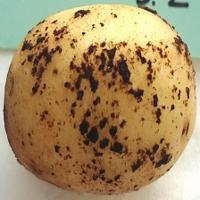

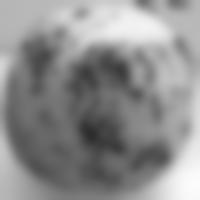

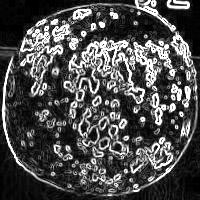

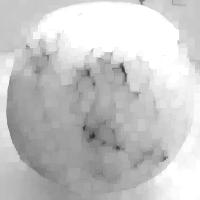

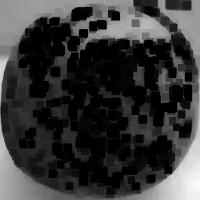

In [103]:
# Compara papa afectada por black scurf antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im1 = Image.open('{}/5.jpg'.format(outPath1))
display(pil_im1)

# Desenfoque Gaussiano
pil_im1g = Image.open('{}/5.jpg'.format(path_g1))
display(pil_im1g)

# Sobel
pil_im1s = Image.open('{}/5.jpg'.format(path_s1))
display(pil_im1s)

# Máximo
pil_im1m = Image.open('{}/5.jpg'.format(path_m1))
display(pil_im1m)

# Mínimo
pil_im1mi = Image.open('{}/5.jpg'.format(path_mi1))
display(pil_im1mi)

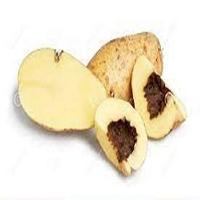

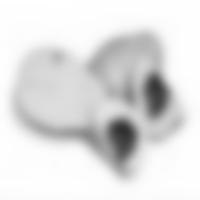

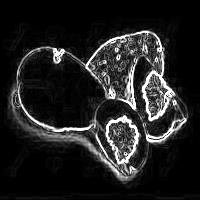

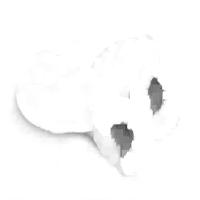

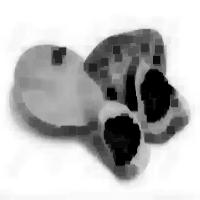

In [104]:
# Compara papa afectada por blackleg antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im2 = Image.open('{}/20.jpg'.format(outPath2))
display(pil_im2)

# Desenfoque Gaussiano
pil_im2g = Image.open('{}/20.jpg'.format(path_g2))
display(pil_im2g)

# Sobel
pil_im2s = Image.open('{}/20.jpg'.format(path_s2))
display(pil_im2s)

# Máximo
pil_im2m = Image.open('{}/20.jpg'.format(path_m2))
display(pil_im2m)

# Mínimo
pil_im2mi = Image.open('{}/20.jpg'.format(path_mi2))
display(pil_im2mi)

Se observa que el filtro Máximo es inadecuado para procesar imágenes con fondo blanco, debido a que es muy difícil distinguir las papas en este caso. Solamente resalta la zona afectada por la enfermedad blackleg.

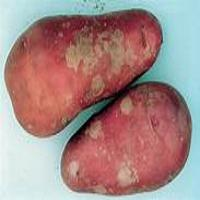

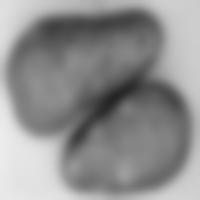

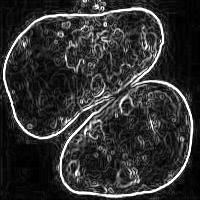

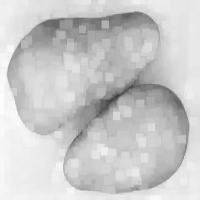

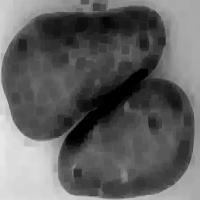

In [105]:
# Compara papa afectada por common scab antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im3 = Image.open('{}/50.jpg'.format(outPath3))
display(pil_im3)

# Desenfoque Gaussiano
pil_im3g = Image.open('{}/50.jpg'.format(path_g3))
display(pil_im3g)

# Sobel
pil_im3s = Image.open('{}/50.jpg'.format(path_s3))
display(pil_im3s)

# Máximo
pil_im3m = Image.open('{}/50.jpg'.format(path_m3))
display(pil_im3m)

# Mínimo
pil_im3mi = Image.open('{}/50.jpg'.format(path_mi3))
display(pil_im3mi)

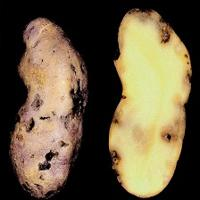

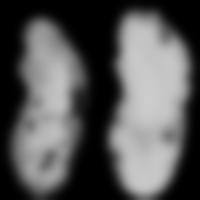

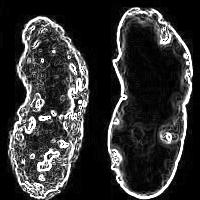

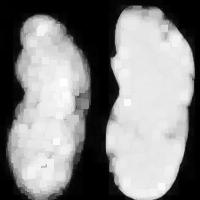

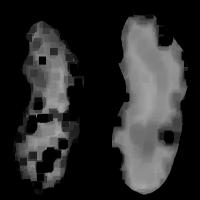

In [106]:
# Compara papa afectada por dry rot antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im4 = Image.open('{}/6.jpg'.format(outPath4))
display(pil_im4)

# Desenfoque Gaussiano
pil_im4g = Image.open('{}/6.jpg'.format(path_g4))
display(pil_im4g)

# Sobel
pil_im4s = Image.open('{}/6.jpg'.format(path_s4))
display(pil_im4s)

# Máximo
pil_im4m = Image.open('{}/6.jpg'.format(path_m4))
display(pil_im4m)

# Mínimo
pil_im4mi = Image.open('{}/6.jpg'.format(path_mi4))
display(pil_im4mi)

La imagen afectada por dry rot se confunde en parte de sus bordes con el fondo negro, no diferenciándose correctamente las zonas afectadas por dry rot con el fondo de la fotografía luego de aplicar el filtro Mínimo.

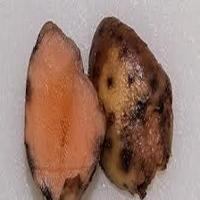

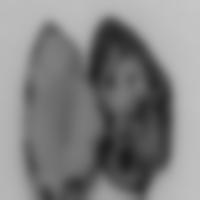

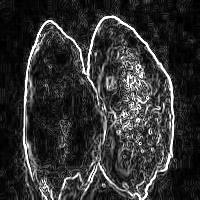

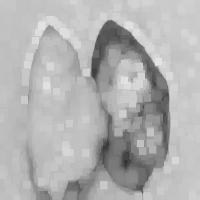

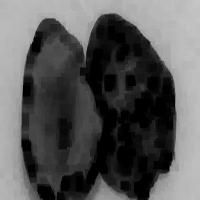

In [107]:
# Compara papa afectada por pink rot antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im5 = Image.open('{}/34.jpg'.format(outPath5))
display(pil_im5)

# Desenfoque Gaussiano
pil_im5g = Image.open('{}/34.jpg'.format(path_g5))
display(pil_im5g)

# Sobel
pil_im5s = Image.open('{}/34.jpg'.format(path_s5))
display(pil_im5s)

# Máximo
pil_im5m = Image.open('{}/34.jpg'.format(path_m5))
display(pil_im5m)

# Mínimo
pil_im5mi = Image.open('{}/34.jpg'.format(path_mi5))
display(pil_im5mi)

La imagen aclarada con el filtro Máximo se confunde parcialmente en los bordes con el fondo gris.

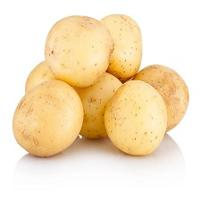

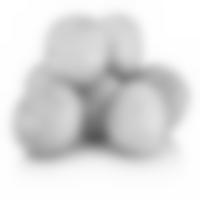

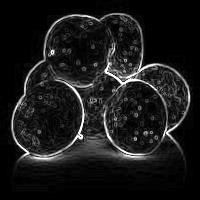

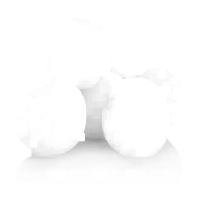

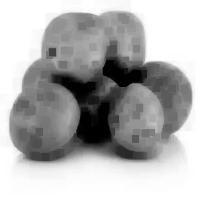

In [108]:
# Compara papa sana antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im6 = Image.open('{}/23.jpg'.format(outPath6))
display(pil_im6)

# Desenfoque Gaussiano
pil_im6g = Image.open('{}/23.jpg'.format(path_g6))
display(pil_im6g)

# Sobel
pil_im6s = Image.open('{}/23.jpg'.format(path_s6))
display(pil_im6s)

# Máximo
pil_im6m = Image.open('{}/23.jpg'.format(path_m6))
display(pil_im6m)

# Mínimo
pil_im6mi = Image.open('{}/23.jpg'.format(path_mi6))
display(pil_im6mi)

La imagen es excesivamente clara luego de aplicar el filtro Máximo, por lo cual es difícil distinguir a las papas del fondo blanco. Este problema también fue observado en el ejemplo de papa infectada por blackleg.

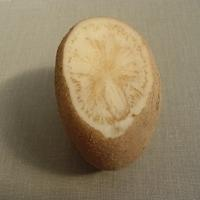

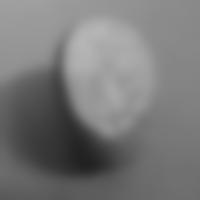

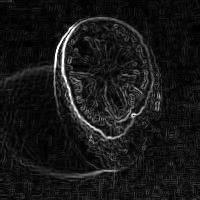

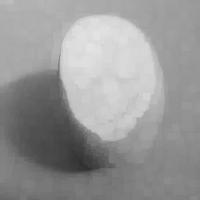

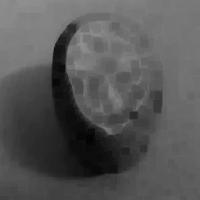

In [109]:
# Compara papa afectada por enfermedad miscelánea antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im7 = Image.open('{}/50.jpg'.format(outPath7))
display(pil_im7)

# Desenfoque Gaussiano
pil_im7g = Image.open('{}/50.jpg'.format(path_g7))
display(pil_im7g)

# Sobel
pil_im7s = Image.open('{}/50.jpg'.format(path_s7))
display(pil_im7s)

# Máximo
pil_im7m = Image.open('{}/50.jpg'.format(path_m7))
display(pil_im7m)

# Mínimo
pil_im7mi = Image.open('{}/50.jpg'.format(path_mi7))
display(pil_im7mi)

En el caso de la aplicación del desenfoque Gaussiano, en todos los casos se obtuvo imágenes desenfocadas en escala de grises.

En el caso de la aplicación del filtro Sobel, las imágenes procesadas con este filtro resaltan los bordes de la papa, mostrando estos bordes mediante líneas blancas sobre un fondo negro.

Al aplicar el filtro Máximo, en todas las imágenes del dataset se observa que las fotografías en escala de grises presentan tonos más claros en comparación a las originales. Este filtro resulta ser problemático si es aplicado a imágenes con fondo blanco, dado que la papa se mimetiza con el fondo.

Luego de aplicar el filtro Mínimo, los tonos de las imágenes resultantes en escala de grises es más oscuro en comparación a las fotos originales. Este filtro no es adecuado si el fondo es de un color oscuro y las papas presentan zonas negras en sus bordes.

# 4.- Pasos siguientes

Se diseñará el flujo de procesamiento del dataset de papas a nivel abstracto, considerando la adquisición de imágenes desde la plataforma Kaggle, su pre-procesamiento para ajustar la resolución de las imágenes y aplicación de filtros (Gaussiano, Sobel, Máximo y Mínimo), el procesamiento de imágenes mediante algoritmos de clasificación multiclase (por ejemplo, SVM, Naïve Bayes y Random Forest), cálculo de los parámetros correspondientes a una clasificación multiclase, y finalmente el almacenamiento de los resultados de la clasificación.

La base de datos de papas será utilizada para clasificarlas en imágenes de papas que presenten alguna de las enfermedades descritas en este trabajo, o si se trata de imágenes de papas sanas.

Para procesar el conjunto completo de imágenes, se medirán los tiempos de ejecución del proceso completo, realizando la medición para el 50% y el 100% de la imágenes varias veces. Los valores a determinar respecto a la clasificación de las imágenes serán tiempo máximo, tiempo mínimo, tiempo medio, desviación estándar del tiempo que demoren los algoritmos de clasificación.

Finalmente se resumirán los resultados del procesamiento, escogiendo una métrica de clasificación - por ejemplo, F1 score - para indicar si las imágenes del dataset de papas fueron clasificadas adecuadamente.

# 5.- Conclusiones

Salvo una imagen de papa en formato png, el resto de las imágenes del dataset se encuentran en formato jpg, lo cual concuerda con el hecho que estas imágenes fueron capturadas mediante cámaras fotográficas.

Se logró cambiar la resolución de las imágenes del dataset completo a una resolución 200x200, para asegurar que funcione correctamente el procesamiento posterior.

Luego de ajustar la resolución se aplicaron los filtros Gaussiano, Sobel, Máximo y Mínimo, convirtiendo previamente las imágenes a escala de grises. El filtro Gaussiano desenfoca las imágenes, mientras que el filtro Sobel detecta los bordes de las papas y los filtros Máximo y Mínimo aclaran y oscurecen las fotografías, respectivamente. Los filtros Máximo y Mínimo resultaron ser inadecuados cuando el fondo de la imagen es similar al color resultante de las papas luego de aplicar estos filtros.

El preprocesamiento realizado es importante para la aplicación de algoritmos de clasificación multiclase que no utilizan redes convolucionales para dicho propósito.